In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
%reload_ext autoreload

import os
import pandas as pd
import torch
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import repackage
repackage.up()

from modelo_perceptron import *
from utils import *
from fluxdataset import *

In [2]:
PATH = "../datos/"
TRAIN_FILE = "exoTrain.csv"

In [4]:
df_train = pd.read_csv(f'{PATH}{TRAIN_FILE}', low_memory=False)
df_train['LABEL'] = df_train['LABEL'].add(-1)

In [5]:
df_train.iloc[:,1:] = df_train.iloc[:,1:].apply(z_score_normalizing, axis = 1)
df_train.iloc[:,1:] = reduce_upper_outliers(df_train.iloc[:,1:])

In [6]:
df_train_x, df_train_y = generate_x_y_df(df_train)
df_train_x = df_train_x.apply(fourier_transformation, axis = 1)
serie = pd.Series(df_train_x)
df_train = pd.DataFrame(serie.values.tolist())
df_train.insert(0, 'LABEL', df_train_y)

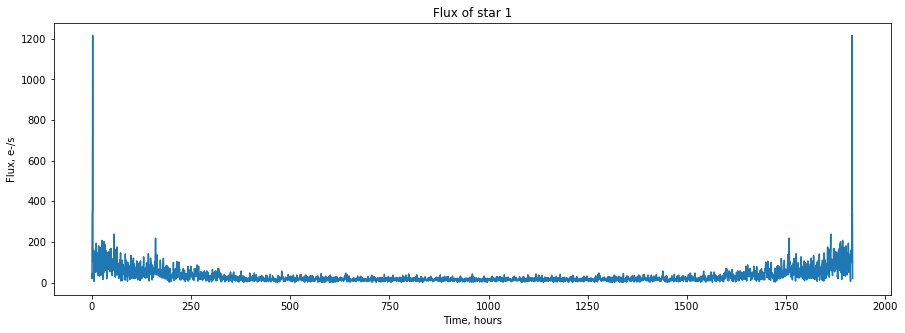

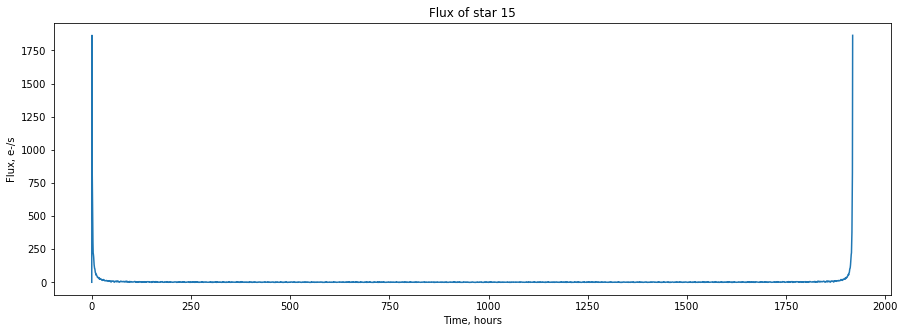

In [7]:
show_flux_plot(df_train.drop('LABEL', axis = 1), [0, 14])

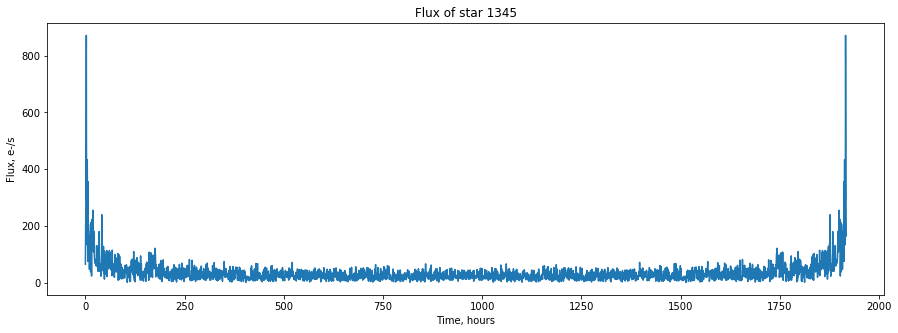

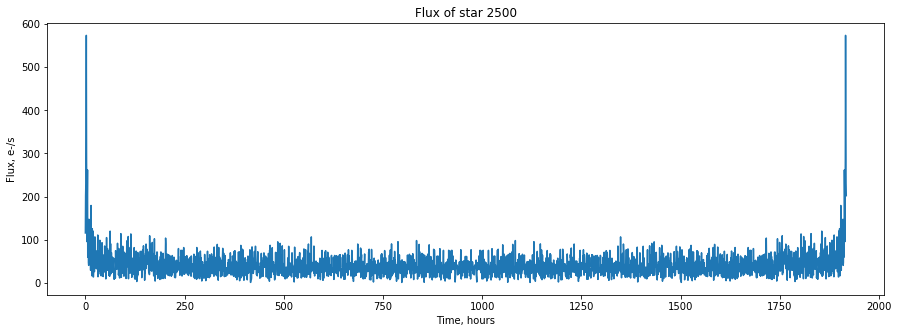

In [8]:
show_flux_plot(df_train.drop('LABEL', axis = 1), [1344, 2499])

In [9]:
# Como fft produce una represetancion de la frecuencia simetrica,
# nos quedamos solo con la primera mitad de las caracteristicas
df_fourier = df_train.iloc[:,:(df_train.shape[1]//2)]

Un par de estrellas con exoplanetas

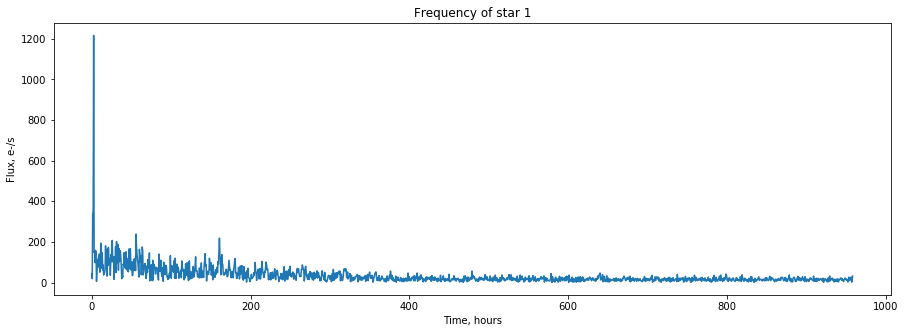

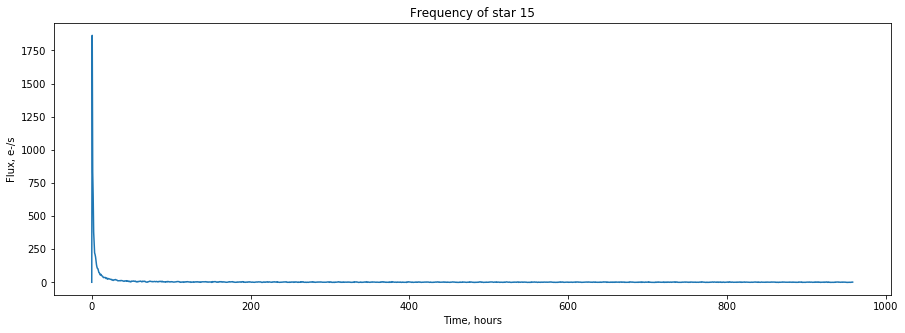

In [10]:
show_flux_plot(df_fourier.drop('LABEL', axis = 1), [0, 14], 'Frequency')

Estrellas sin exoplanetas

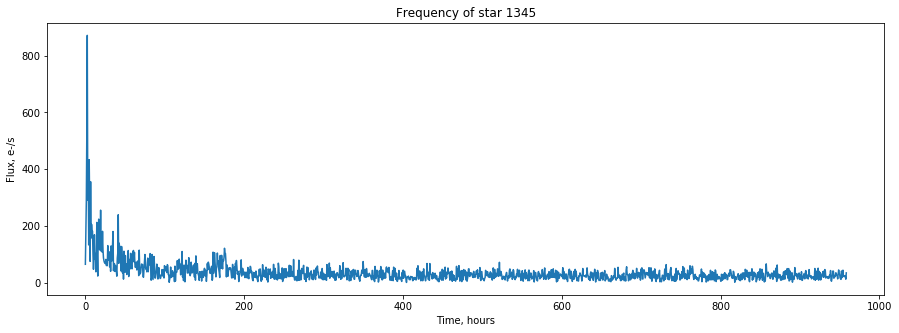

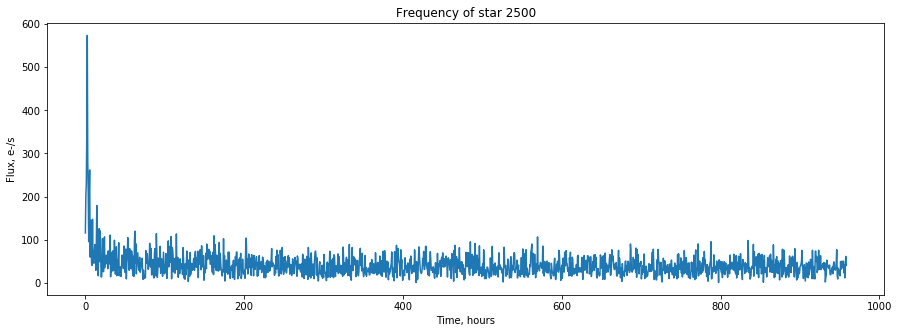

In [11]:
show_flux_plot(df_fourier.drop('LABEL', axis = 1), [1344, 2499], 'Frequency')

In [12]:
df_fourier.iloc[:,1:] = df_fourier.iloc[:,1:].apply(z_score_normalizing, axis = 1)
validation_proportion = 0.2
df_train_fourier, df_validation_fourier = split_train_df(df_fourier, validation_proportion)

In [13]:
epochs = 100
learning_rate = 0.001
alpha = 0.5
beta = 0.5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
sizes = [1598, 1000, 250, 20]
modelo = Perceptron(sizes).to(device)
model_name = os.getcwd() + "\\saved_models\\perceptron_sgd_cross_fourier"
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(modelo.parameters(), lr = learning_rate)

In [15]:
train_losses, validation_losses, scores = train_cross(modelo, model_name, criterion, optimizer, epochs, alpha, beta,
                                                df_train_fourier, df_validation_fourier, device)

using device cuda
Score 0.4965585172176361 at epoch 0
New model saved
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1010		0
Positivos	7		0

Acierto: 0.9931170344352722 Sensibilidad: 0.0 Especificidad: 1.0 Score: 0.4965585172176361

Epoch: 0 Train loss 0.09341272544802261 Validation loss 0.041573211550712585
Score 0.4965585172176361 at epoch 1
Epoch: 1 Train loss 0.04369196090709958 Validation loss 0.03943514823913574
Score 0.4965585172176361 at epoch 2
Epoch: 2 Train loss 0.040191605621239475 Validation loss 0.03750767558813095
Score 0.4965585172176361 at epoch 3
Epoch: 3 Train loss 0.03675438423414488 Validation loss 0.0360642671585083
Score 0.4965585172176361 at epoch 4
Epoch: 4 Train loss 0.03292352107584623 Validation loss 0.03494008257985115
Score 0.4965585172176361 at epoch 5
Epoch: 5 Train loss 0.029048761923131543 Validation loss 0.03349684551358223
Score 0.4965585172176361 at epoch 6
Epoch: 6 Train loss 0.024621329407141308 Validation loss 0.032

Score 0.7114763855934143 at epoch 62
Epoch: 62 Train loss 0.0007278442529261259 Validation loss 0.040642231702804565
Score 0.6396965980529785 at epoch 63
Epoch: 63 Train loss 0.0007432313603909655 Validation loss 0.03988213464617729
Score 0.6396965980529785 at epoch 64
Epoch: 64 Train loss 0.0006243396742630943 Validation loss 0.041534047573804855
Score 0.7114763855934143 at epoch 65
Epoch: 65 Train loss 0.0006623442987259249 Validation loss 0.037788618355989456
Score 0.6396965980529785 at epoch 66
Epoch: 66 Train loss 0.00027849709372555596 Validation loss 0.041350122541189194
Score 0.6396965980529785 at epoch 67
Epoch: 67 Train loss 0.0006901898167350075 Validation loss 0.04191497340798378
Score 0.6396965980529785 at epoch 68
Epoch: 68 Train loss 0.0008186150534440024 Validation loss 0.04491690546274185
Score 0.6396965980529785 at epoch 69
Epoch: 69 Train loss 0.0014085836141056744 Validation loss 0.04118441790342331
Score 0.6396965980529785 at epoch 70
Epoch: 70 Train loss 0.0006044

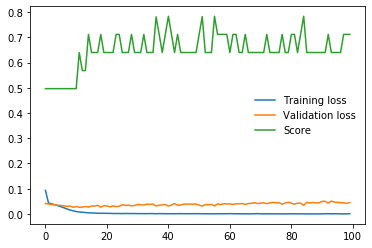

In [16]:
plt.plot(train_losses, label = 'Training loss')
plt.plot(validation_losses, label = 'Validation loss')
plt.plot(scores, label = 'Score')
plt.legend(frameon = False)

Fourier con SMOTE

In [17]:
df_fourier_x, df_fourier_y = generate_x_y_df(df_fourier)
sm = SMOTE()
df_smote_fourier_x, df_smote_fourier_y = sm.fit_sample(df_fourier_x, df_fourier_y)
df_smote_fourier = pd.DataFrame(df_smote_fourier_x)
df_smote_fourier.insert(0, 'LABEL', df_smote_fourier_y)
df_smote_fourier.iloc[:,1:] = df_smote_fourier.iloc[:,1:].apply(z_score_normalizing, axis = 1)
validation_proportion = 0.2
df_smote_fourier, df_smote_validation = split_train_df(df_smote_fourier, validation_proportion)

In [18]:
sizes = [1598, 1000, 250, 20]
modelo = Perceptron(sizes).to(device)
model_name = os.getcwd() + "\\saved_models\\perceptron_sgd_cross_smote_fourier"
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(modelo.parameters(), lr = learning_rate)

In [19]:
train_losses, validation_losses, scores = train_cross(modelo, model_name, criterion, optimizer, epochs, alpha, beta,
                                                df_smote_fourier, df_smote_validation, device)

using device cuda
Score 0.9646741151809692 at epoch 0
New model saved
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1008		2
Positivos	34		976

Acierto: 0.982178270816803 Sensibilidad: 0.9663366079330444 Especificidad: 0.998019814491272 Score: 0.9646741151809692

Epoch: 0 Train loss 0.15979499223061128 Validation loss 0.04689585790038109
Score 0.9793160557746887 at epoch 1
New model saved
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1010		0
Positivos	21		989

Acierto: 0.9896039962768555 Sensibilidad: 0.9792079329490662 Especificidad: 1.0 Score: 0.9793160557746887

Epoch: 1 Train loss 0.014484719954209753 Validation loss 0.027000337839126587
Score 0.9990101456642151 at epoch 2
New model saved
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1009		1
Positivos	0		1010

Acierto: 0.9995049834251404 Sensibilidad: 1.0 Especificidad: 0.999009907245636 Score: 0.9990101456642151

Epoch: 2 Train loss 0.00

Score 0.9990101456642151 at epoch 63
Epoch: 63 Train loss 0.00010083462342177287 Validation loss 0.0014670240925624967
Score 0.9990101456642151 at epoch 64
Epoch: 64 Train loss 0.0001196492463350296 Validation loss 0.001291368855163455
Score 0.9990101456642151 at epoch 65
Epoch: 65 Train loss 0.00011216185175546325 Validation loss 0.0014705185312777758
Score 0.9990101456642151 at epoch 66
Epoch: 66 Train loss 0.00011402606816575079 Validation loss 0.0012468392960727215
Score 0.9990101456642151 at epoch 67
Epoch: 67 Train loss 0.0001293611187155884 Validation loss 0.0013774941908195615
Score 0.9990101456642151 at epoch 68
Epoch: 68 Train loss 0.00012890949550241527 Validation loss 0.0014446331188082695
Score 0.9990101456642151 at epoch 69
Epoch: 69 Train loss 0.00015890676491331346 Validation loss 0.0017444271361455321
Score 0.9990101456642151 at epoch 70
Epoch: 70 Train loss 0.0001760611144622954 Validation loss 0.0013593989424407482
Score 0.9990101456642151 at epoch 71
Epoch: 71 Train

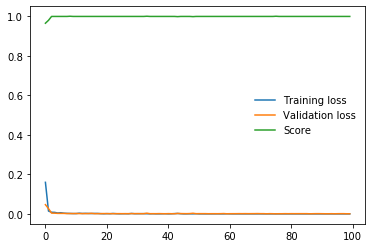

In [20]:
plt.plot(train_losses, label = 'Training loss')
plt.plot(validation_losses, label = 'Validation loss')
plt.plot(scores, label = 'Score')
plt.legend(frameon = False)